
**SESIÓN 05** | MÁSTER UNIVERSITARIO EN CIENCIA DE DATOS | **CUNEF UNIVERSIDAD**

`v2.2B`
---


# Predicción de Series Temporales
## VAR

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Packages

In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str

In [3]:
# Importamos la libreria de gráficos Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 3)})

## Datos
Seleccionamos del COVID


In [4]:

#mdata = sm.datasets.macrodata.load_pandas().data
mdata= pd.read_excel("UAE.xlsx")

#mdata=pd.read_csv("CP/owid-covid-data.xlsx",sep=';')

In [5]:
mdata.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ARE,Asia,United Arab Emirates,2020-01-29,4,4,NaN,NaN,NaN,NaN,...,1.2,37.4,NaN,1.2,77.97,0.89,NaN,NaN,NaN,NaN
1,ARE,Asia,United Arab Emirates,2020-01-30,4,0,NaN,NaN,NaN,NaN,...,1.2,37.4,NaN,1.2,77.97,0.89,NaN,NaN,NaN,NaN
2,ARE,Asia,United Arab Emirates,2020-01-31,4,0,NaN,NaN,NaN,NaN,...,1.2,37.4,NaN,1.2,77.97,0.89,NaN,NaN,NaN,NaN
3,ARE,Asia,United Arab Emirates,2020-02-01,4,0,NaN,NaN,NaN,NaN,...,1.2,37.4,NaN,1.2,77.97,0.89,NaN,NaN,NaN,NaN
4,ARE,Asia,United Arab Emirates,2020-02-02,5,1,NaN,NaN,NaN,NaN,...,1.2,37.4,NaN,1.2,77.97,0.89,NaN,NaN,NaN,NaN


In [7]:
#Manu: La fecha es texto. La pasamos a fecha.
pd.DatetimeIndex(dates_from_str(mdata['date']))

DatetimeIndex(['2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07',
               ...
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13'],
              dtype='datetime64[ns]', length=989, freq=None)

In [8]:
#Manu: nos quedamos con fecha, nuevos casos y nuevos muertos. El resto nos da igual.
mdata=mdata[['date','new_cases','new_deaths']]
mdata.index = pd.DatetimeIndex(dates_from_str(mdata['date']))
mdata.drop('date', axis=1, inplace=True)
mdata

,new_cases,new_deaths
2020-01-29,4,NaN
2020-01-30,0,NaN
2020-01-31,0,NaN
2020-02-01,0,NaN
2020-02-02,1,NaN
...,...,...
2022-10-09,359,0.0
2022-10-10,342,0.0
2022-10-11,321,0.0
2022-10-12,337,0.0


In [9]:
# select data from March 20, 2020, to March 20, 2021.
# train:  until March 10, 2021
# test: from March 11 toMarch 20, 2021

data_train=mdata['2020-03-20':'2021-03-10']
data_test=mdata['2021-03-11':'2021-03-20']


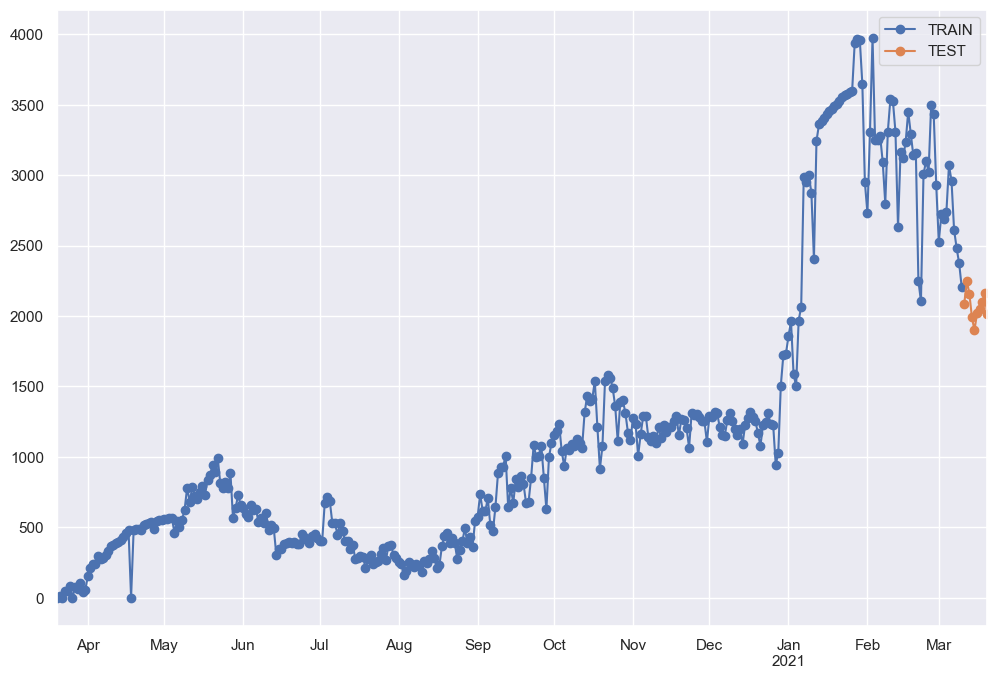

In [10]:
# Plot data 'new_cases'
data_train['new_cases'].plot(legend=True,label='TRAIN',marker='o')
data_test['new_cases'].plot(legend=True,label='TEST',figsize=(12,8),marker='o');

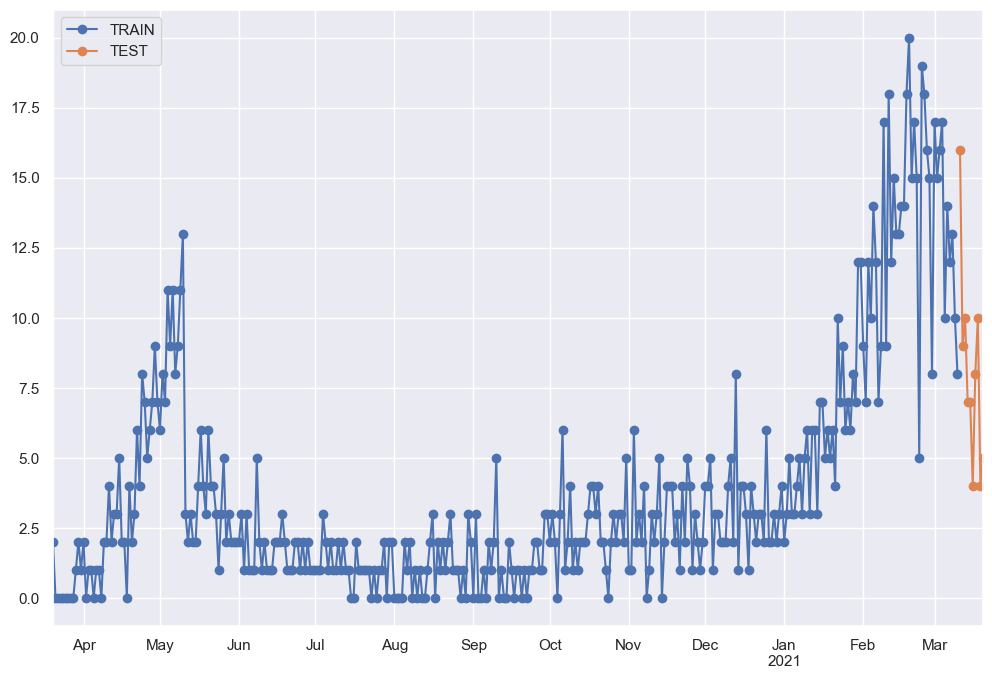

In [11]:
# Plot data 'new_deaths'
data_train['new_deaths'].plot(legend=True,label='TRAIN',marker='o')
data_test['new_deaths'].plot(legend=True,label='TEST',figsize=(12,8),marker='o');

In [13]:
# crear rolling mean 7 days
#Manu: es muy difícil saber el número de nuevos casos o muertos diarios. En la pandemia había días de la semana que se registraban mmuchos más casos.
mdata_ma=mdata['2020-03-20':'2021-03-20'].rolling(7).mean()
data_train_ma=mdata_ma['2020-03-20':'2021-03-10']
data_test_ma=mdata_ma['2021-03-11':'2021-03-20']


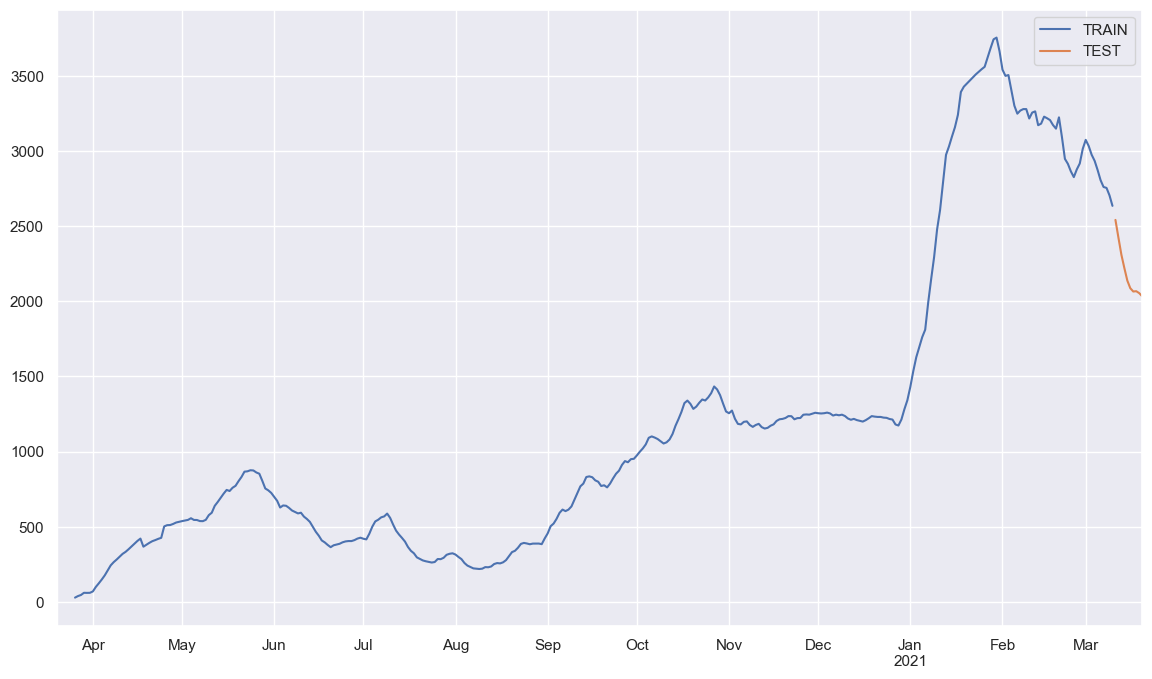

In [14]:
# Plot data 'new_cases'
data_train_ma['new_cases'].plot(legend=True,label='TRAIN')
data_test_ma['new_cases'].plot(legend=True,label='TEST',figsize=(14,8));

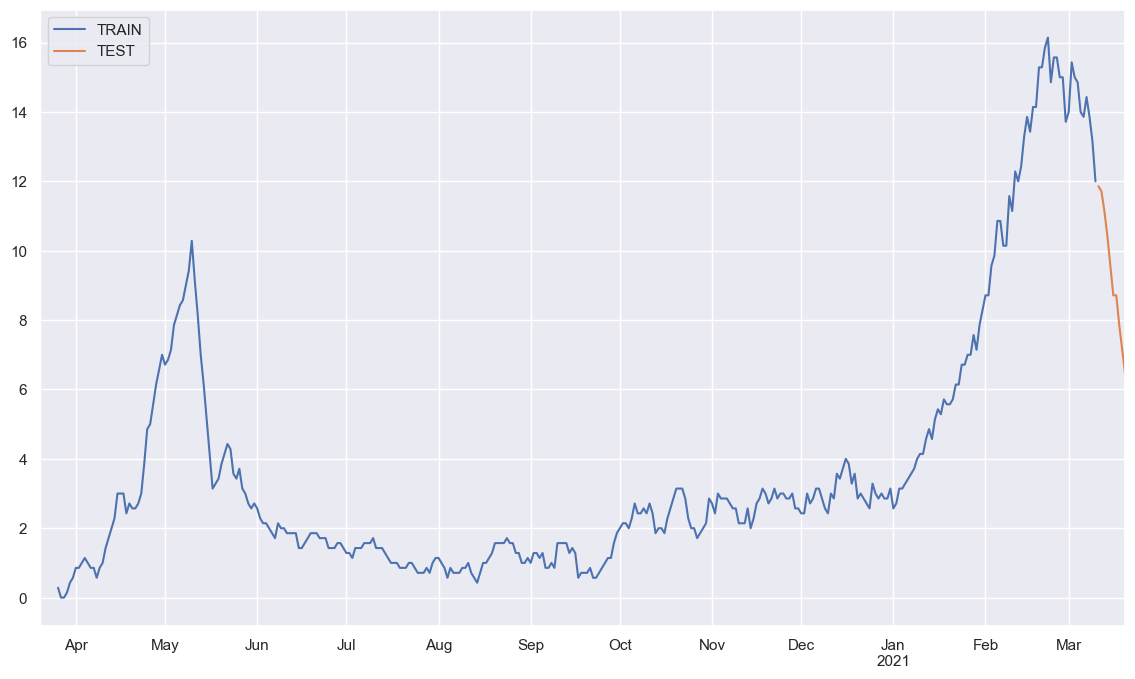

In [15]:
# Plot data 'new_deaths'
data_train_ma['new_deaths'].plot(legend=True,label='TRAIN',)
data_test_ma['new_deaths'].plot(legend=True,label='TEST',figsize=(14,8));

In [16]:
# Transformacion estacionaria
# diferencia
d_data_train=data_train.diff().dropna()
d_data_train

,new_cases,new_deaths
2020-03-21,13.0,-2.0
2020-03-22,-13.0,0.0
2020-03-23,45.0,0.0
2020-03-24,5.0,0.0
2020-03-25,35.0,0.0
...,...,...
2021-03-06,-113.0,4.0
2021-03-07,-346.0,-2.0
2021-03-08,-130.0,1.0
2021-03-09,-110.0,-3.0


<Axes: >

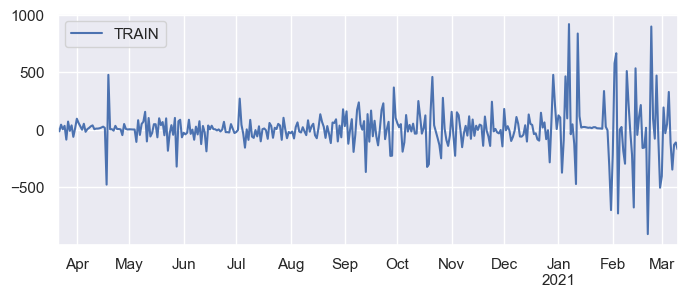

In [17]:
# Plot data 'new_cases'
d_data_train['new_cases'].plot(legend=True,label='TRAIN')

<Axes: >

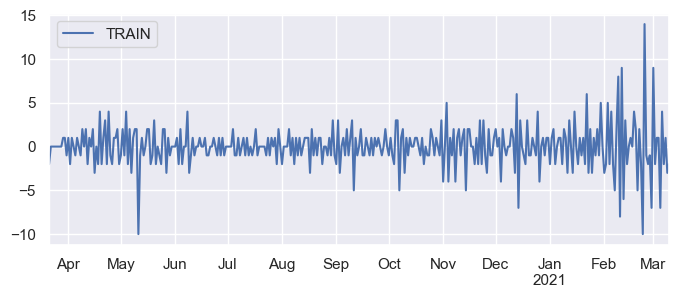

In [18]:
# Plot data 'new_deaths'
d_data_train['new_deaths'].plot(legend=True,label='TRAIN',)

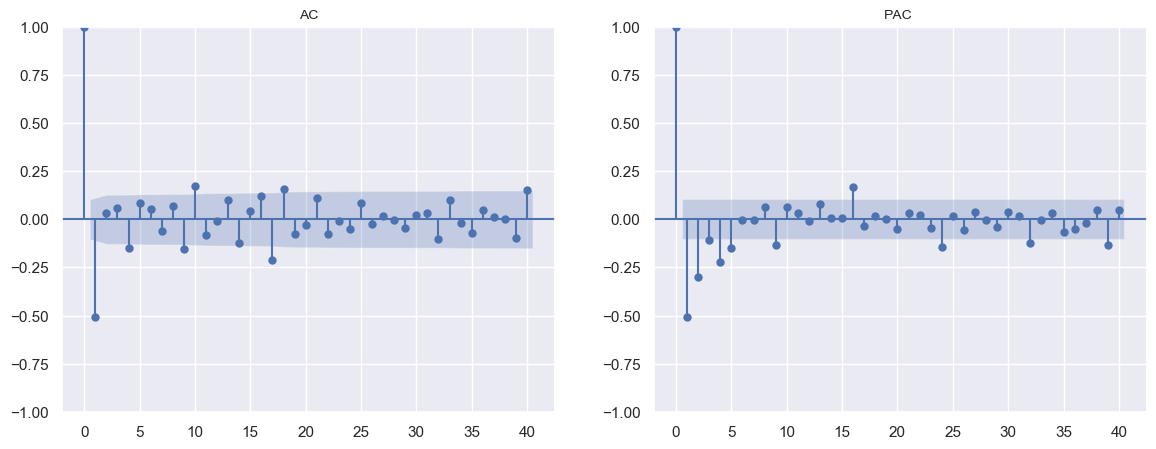

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot
# satsmodels
plt.close()
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plot_acf(d_data_train['new_deaths'].dropna(), lags=40, ax=ax1)
ax1.set_title('AC', fontsize=10)

plot_pacf(d_data_train['new_deaths'].dropna(), lags=40, method='ywm', ax=ax2)
ax2.set_title('PAC ', fontsize=10)

plt.show()
plt.close()
#Miramos a cer si hay correlación, para saber si hay relación entre muertos y nuevos muertos.
#El día cero es hoy, por tanto lógico que dé uno. Las muertes de ayer están correlacionadas
#negativamente, es decir: que si ayer subieron las muertes, lo más problable es que hoy bajen. 
#Lo hacemos todo fijándonos en el de la izquierda

## Test de Causalidad de Granger
Hasta 30 retardos

In [22]:
#Test de Granger: ¿Los casos explican las muertes?
#Fijándonos en la P de cada uno, cuando las veamos pequeñas, tendrá que ver. Aquí, a partir del día 29 o 30 (que cuadra con lo que tarda una persona en morirse). 
gc_res = grangercausalitytests(d_data_train[['new_cases','new_deaths']], 30)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0688  , p=0.7933  , df_denom=351, df_num=1
ssr based chi2 test:   chi2=0.0694  , p=0.7923  , df=1
likelihood ratio test: chi2=0.0694  , p=0.7923  , df=1
parameter F test:         F=0.0688  , p=0.7933  , df_denom=351, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3504  , p=0.7047  , df_denom=348, df_num=2
ssr based chi2 test:   chi2=0.7108  , p=0.7009  , df=2
likelihood ratio test: chi2=0.7101  , p=0.7011  , df=2
parameter F test:         F=0.3504  , p=0.7047  , df_denom=348, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7153  , p=0.5434  , df_denom=345, df_num=3
ssr based chi2 test:   chi2=2.1895  , p=0.5340  , df=3
likelihood ratio test: chi2=2.1827  , p=0.5354  , df=3
parameter F test:         F=0.7153  , p=0.5434  , df_denom=345, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1339  , p=0.3403  

In [23]:
#Manu: En las casas donde hubo un muerto, todos cogieron el covid. Es la explicación plausible a que aquí los diga que sí que nuevas muertes explican nuevos casos.
gc_res = grangercausalitytests(d_data_train[['new_deaths','new_cases']], 30)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6534  , p=0.4195  , df_denom=351, df_num=1
ssr based chi2 test:   chi2=0.6590  , p=0.4169  , df=1
likelihood ratio test: chi2=0.6584  , p=0.4171  , df=1
parameter F test:         F=0.6534  , p=0.4195  , df_denom=351, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6030  , p=0.0283  , df_denom=348, df_num=2
ssr based chi2 test:   chi2=7.3096  , p=0.0259  , df=2
likelihood ratio test: chi2=7.2350  , p=0.0269  , df=2
parameter F test:         F=3.6030  , p=0.0283  , df_denom=348, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6786  , p=0.0469  , df_denom=345, df_num=3
ssr based chi2 test:   chi2=8.1988  , p=0.0421  , df=3
likelihood ratio test: chi2=8.1047  , p=0.0439  , df=3
parameter F test:         F=2.6786  , p=0.0469  , df_denom=345, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2419  , p=0.0642  

## Modelo VAR

In [27]:
# definir el VAR
model = VAR(d_data_train)
# maximo lag a seleccionar
model.select_order(30)

C:\Users\manue\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
# estimar los modelos y seleccionar
results = model.fit(maxlags=30, ic='aic')

In [29]:
# lag con menor AIC
results.k_ar

28

In [31]:
# El modelo estimado
#Manu: las muertes del 28 son significativas para explicar los casos que hay hoy.
#Manu: Las muertes de hoy vienen explicadas por los casos y las muertes de hace dos días.
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 31, Oct, 2023
Time:                     17:04:29
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    12.9519
Nobs:                     327.000    HQIC:                   12.1578
Log likelihood:          -2715.59    FPE:                    113301.
AIC:                      11.6306    Det(Omega_mle):         82160.9
--------------------------------------------------------------------
Results for equation new_cases
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  6.684797         9.838235            0.679           0.497
L1.new_cases          -0.201190         0.060886           -3.304           0.001
L1.new_deaths         -1.004281         5.373333    

## Gráfico de los datos

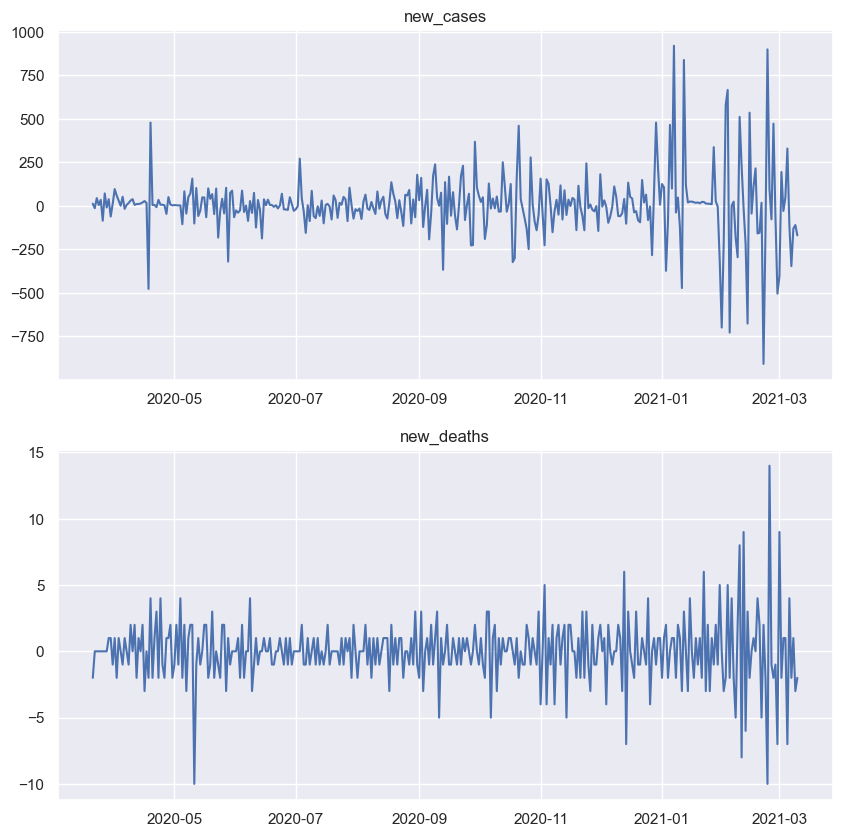

In [32]:
results.plot();

## Correlaciones de los residuos

¿Son ruido blanco?

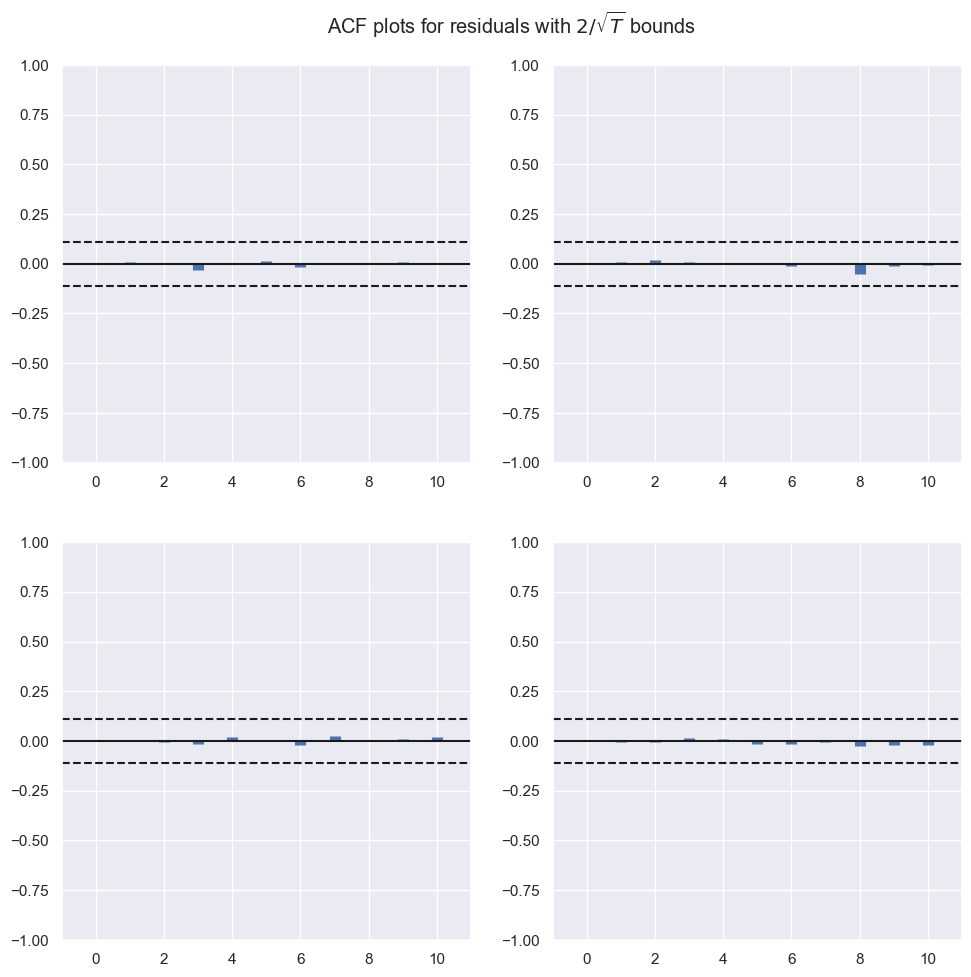

In [35]:
results.plot_acorr();
#Manu: sí son ruido blanco.

## Predicción
### Es necesario darle los valores iniciales, para la predicción recursiva. 
### ES el orden del VAR


In [36]:
lag_order = results.k_ar
lag_order

28

In [37]:
#Cogemos los últimos 28 de las dos variables.
d_data_train.values[-lag_order:]

array([[ -14.,    9.],
       [-218.,   -6.],
       [-676.,    3.],
       [ 536.,   -2.],
       [ -44.,    0.],
       [ 113.,    1.],
       [ 216.,    0.],
       [-158.,    4.],
       [-154.,    2.],
       [  18.,   -5.],
       [-908.,    2.],
       [-145.,   -2.],
       [ 900.,  -10.],
       [  97.,   14.],
       [ -77.,   -1.],
       [ 473.,   -2.],
       [ -64.,   -1.],
       [-504.,   -7.],
       [-404.,    9.],
       [ 195.,   -2.],
       [ -29.,    1.],
       [  50.,    1.],
       [ 330.,   -7.],
       [-113.,    4.],
       [-346.,   -2.],
       [-130.,    1.],
       [-110.,   -3.],
       [-169.,   -2.]])

In [38]:
# Hacemos 10 predicciones
results.forecast(d_data_train.values[-lag_order:], 10)

array([[  45.63327341,    2.13251232],
       [ 282.5792349 ,    1.59258683],
       [  50.45403495,   -1.22534525],
       [-535.89049925,    4.2932861 ],
       [-152.33135491,   -6.72214875],
       [ 318.99195525,   -0.96927922],
       [ 101.65420811,    3.35391105],
       [ -63.97947186,   -2.90341147],
       [ 414.85575383,    3.85530604],
       [-205.25651008,   -4.59914708]])

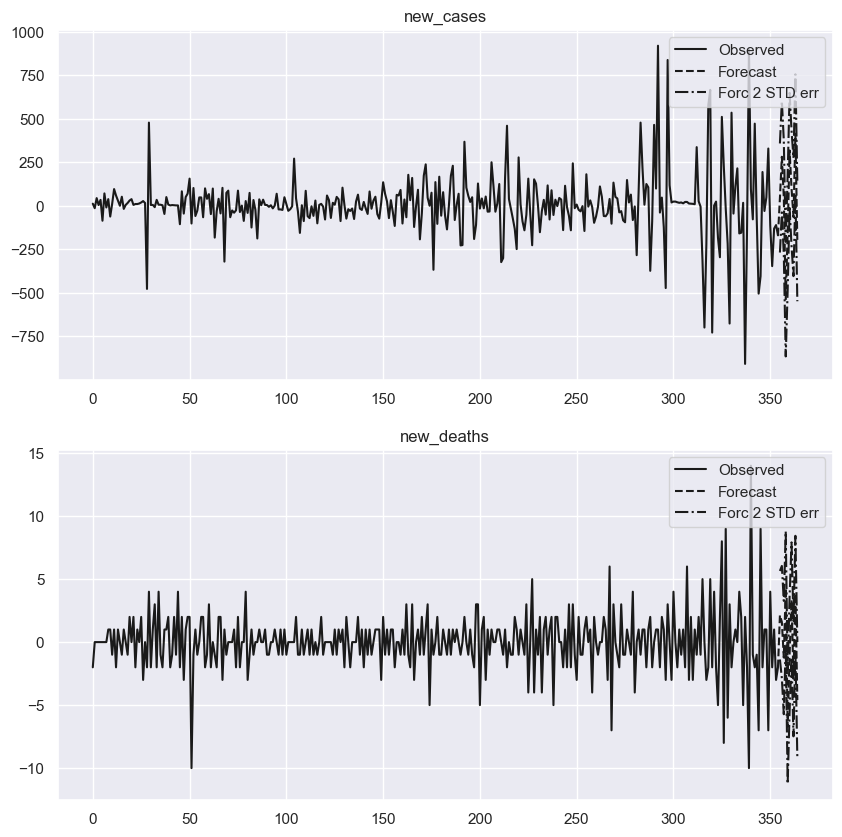

In [39]:
results.plot_forecast(10);

In [41]:
#Manu: no se ve nada, porque hay que deshacer los cambios, es decir: la media móvil 7 y las diferencias
results.forecast(d_data_train.values[-lag_order:], 10)

array([[  45.63327341,    2.13251232],
       [ 282.5792349 ,    1.59258683],
       [  50.45403495,   -1.22534525],
       [-535.89049925,    4.2932861 ],
       [-152.33135491,   -6.72214875],
       [ 318.99195525,   -0.96927922],
       [ 101.65420811,    3.35391105],
       [ -63.97947186,   -2.90341147],
       [ 414.85575383,    3.85530604],
       [-205.25651008,   -4.59914708]])

In [42]:
np.cumsum(results.forecast(d_data_train.values[-lag_order:], 10),axis=0)

array([[ 4.56332734e+01,  2.13251232e+00],
       [ 3.28212508e+02,  3.72509915e+00],
       [ 3.78666543e+02,  2.49975390e+00],
       [-1.57223956e+02,  6.79304001e+00],
       [-3.09555311e+02,  7.08912586e-02],
       [ 9.43664435e+00, -8.98387960e-01],
       [ 1.11090852e+02,  2.45552309e+00],
       [ 4.71113806e+01, -4.47888379e-01],
       [ 4.61967134e+02,  3.40741766e+00],
       [ 2.56710624e+02, -1.19172942e+00]])

In [43]:
# acumular las diferencias y sumar la valor inicial

f_data=data_train.values[-1:]+np.cumsum(results.forecast(d_data_train.values[-lag_order:], 10),axis=0)
f_data

array([[2249.63327341,   10.13251232],
       [2532.2125083 ,   11.72509915],
       [2582.66654325,   10.4997539 ],
       [2046.776044  ,   14.79304001],
       [1894.4446891 ,    8.07089126],
       [2213.43664435,    7.10161204],
       [2315.09085246,   10.45552309],
       [2251.1113806 ,    7.55211162],
       [2665.96713442,   11.40741766],
       [2460.71062434,    6.80827058]])

In [44]:
data_fore=pd.DataFrame(f_data)
data_fore.index=data_test.index
data_fore.rename(columns={0: 'f_cases', 1: 'f_deaths'}, inplace=True)
data_fore

,f_cases,f_deaths
2021-03-11,2249.633273,10.132512
2021-03-12,2532.212508,11.725099
2021-03-13,2582.666543,10.499754
2021-03-14,2046.776044,14.793040
2021-03-15,1894.444689,8.070891
2021-03-16,2213.436644,7.101612
2021-03-17,2315.090852,10.455523
2021-03-18,2251.111381,7.552112
2021-03-19,2665.967134,11.407418
2021-03-20,2460.710624,6.808271


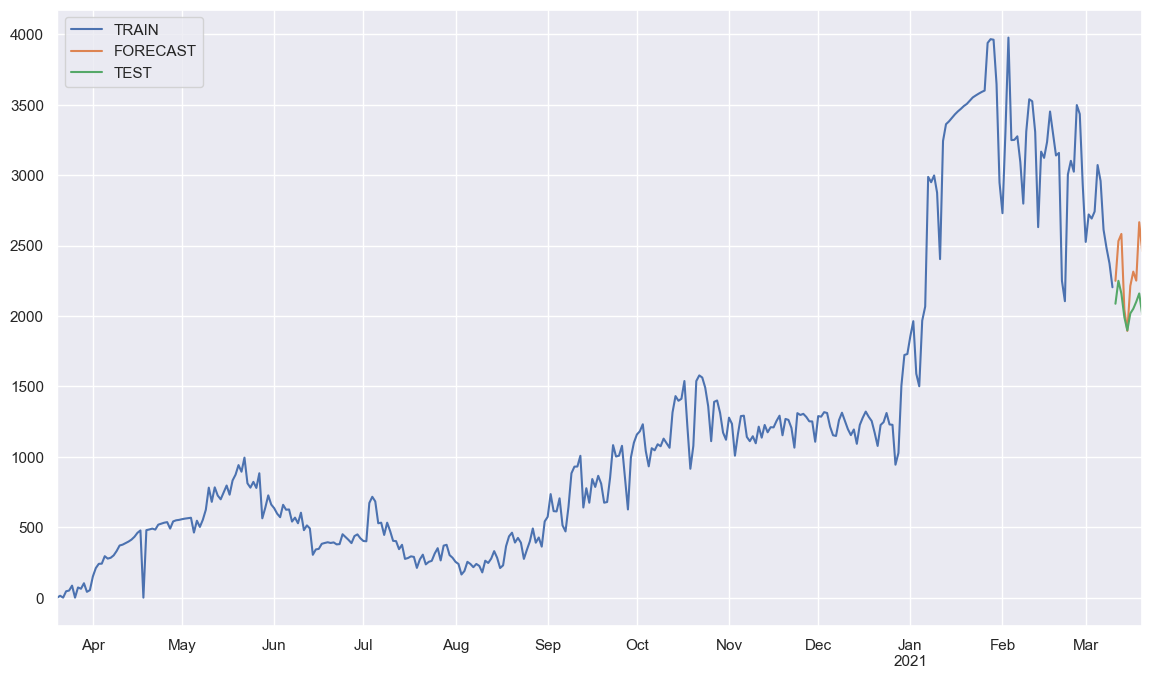

In [45]:
data_train['new_cases'].plot(legend=True,label='TRAIN',)
data_fore['f_cases'].plot(legend=True,label='FORECAST')
data_test['new_cases'].plot(legend=True,label='TEST',figsize=(14,8));

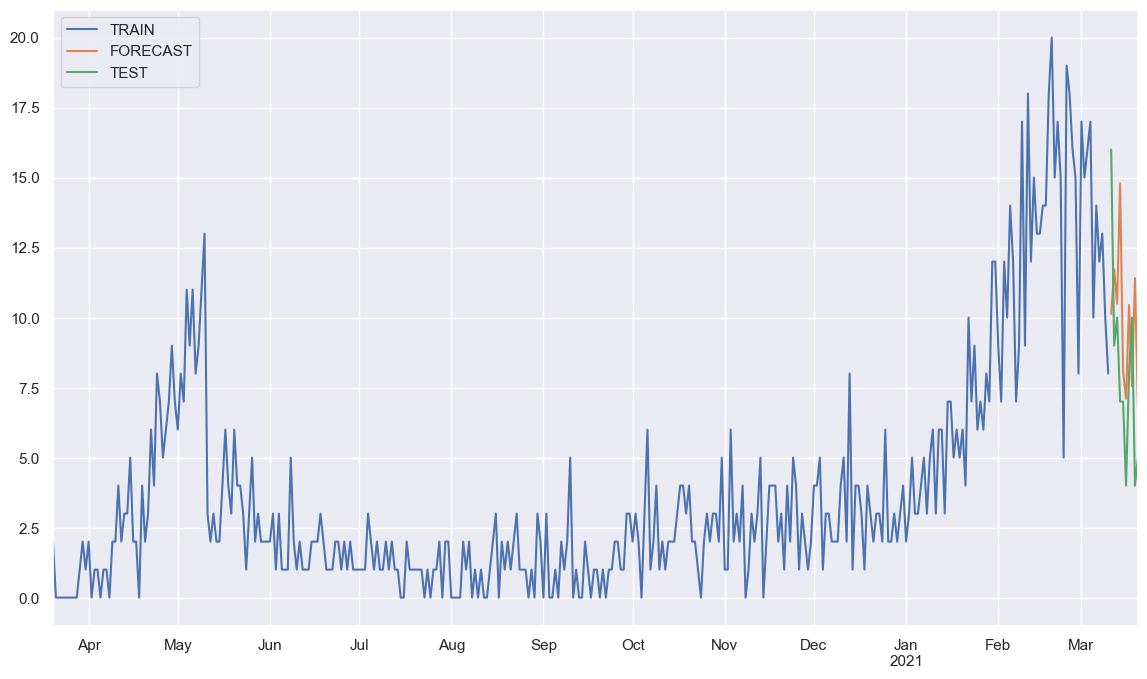

In [46]:
data_train['new_deaths'].plot(legend=True,label='TRAIN',)
data_fore['f_deaths'].plot(legend=True,label='FORECAST')
data_test['new_deaths'].plot(legend=True,label='TEST',figsize=(14,8));

In [47]:
data_for_ma=pd.concat([data_train['new_deaths'],data_fore['f_deaths']],axis=0).rolling(7).mean().dropna()
data_for_ma=pd.DataFrame(data_for_ma)
data_for_ma.rename(columns={0: 'f_deaths'}, inplace=True)
data_for_ma

,f_deaths
2020-03-26,0.285714
2020-03-27,0.000000
2020-03-28,0.000000
2020-03-29,0.142857
2020-03-30,0.428571
...,...
2021-03-16,10.046130
2021-03-17,10.396919
2021-03-18,10.028290
2021-03-19,9.982907


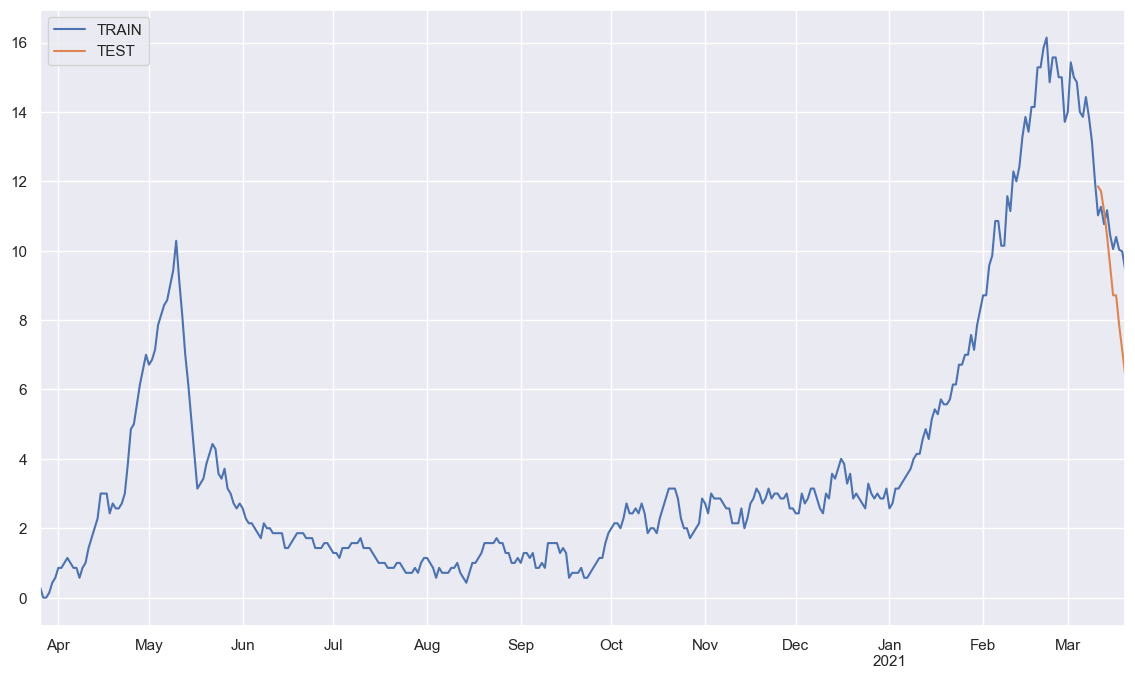

In [48]:
data_for_ma['f_deaths'].plot(legend=True,label='TRAIN',)
data_test_ma['new_deaths'].plot(legend=True,label='TEST',figsize=(14,8));

In [49]:
from statsmodels.tools.eval_measures import rmse
rmse(data_fore['f_deaths'],data_test['new_deaths'])

4.286759135407098

In [50]:
rmse(data_for_ma['f_deaths'][-10:],data_test_ma['new_deaths'])

1.700744929727226

## Función de Respuesta al Impulso

In [53]:
irf = results.irf(30)

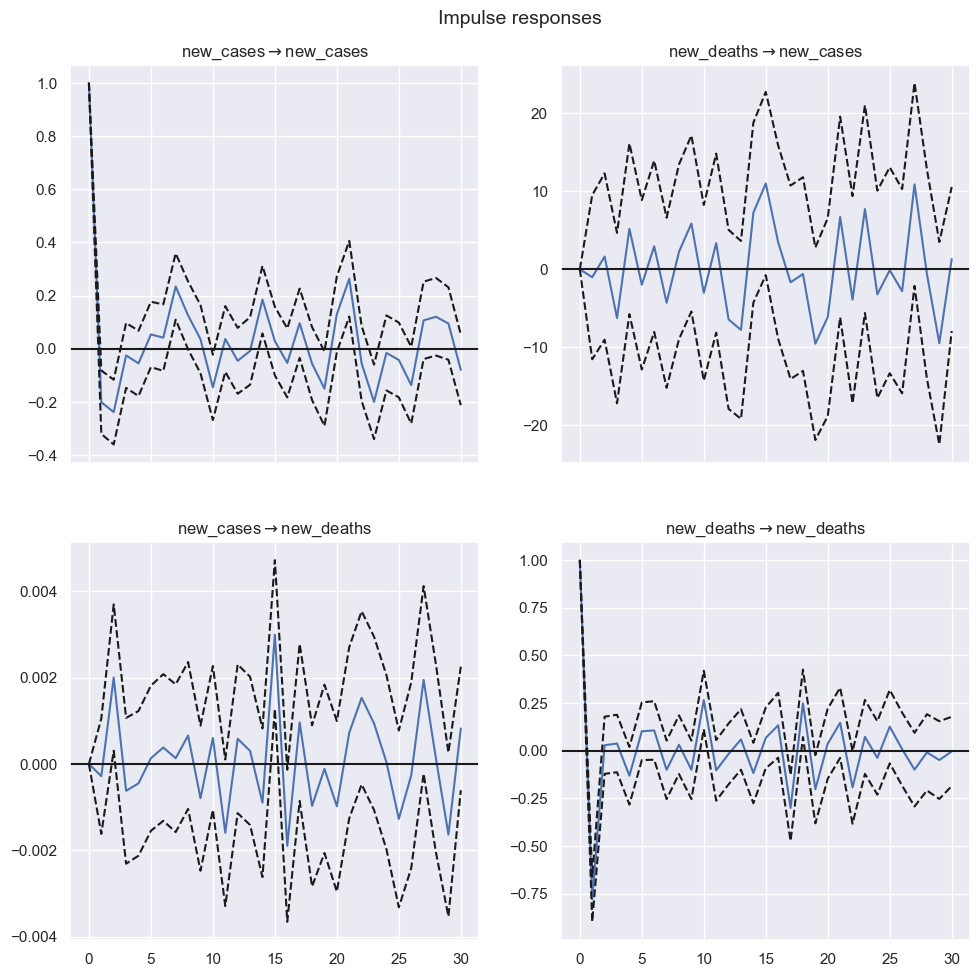

In [55]:
irf.plot(orth=False);
#Manu: en el de abajo a la izquierda vemos como la gente, a los 15 días de dar positivo era cuando moría

## Función de Respuesta al Impulso(Individual)

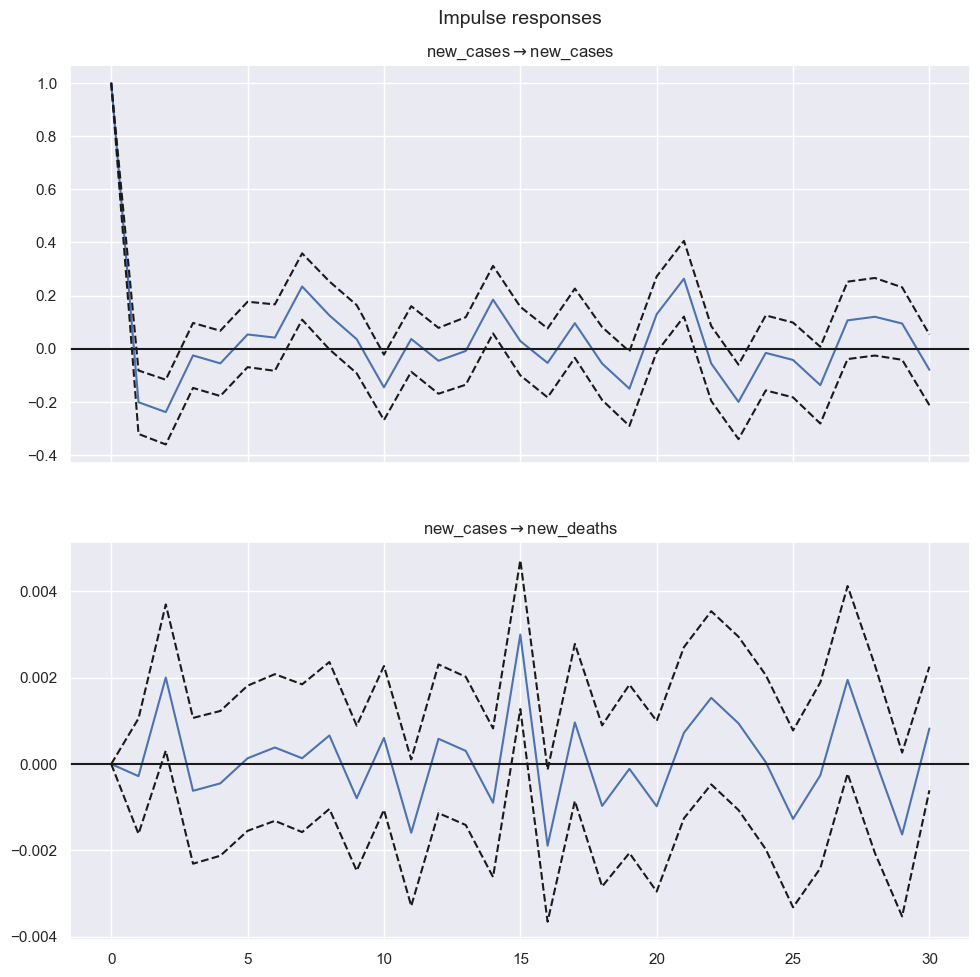

In [56]:
irf.plot(impulse='new_cases');

## Función de Respuesta al Impulso ACUMULADA

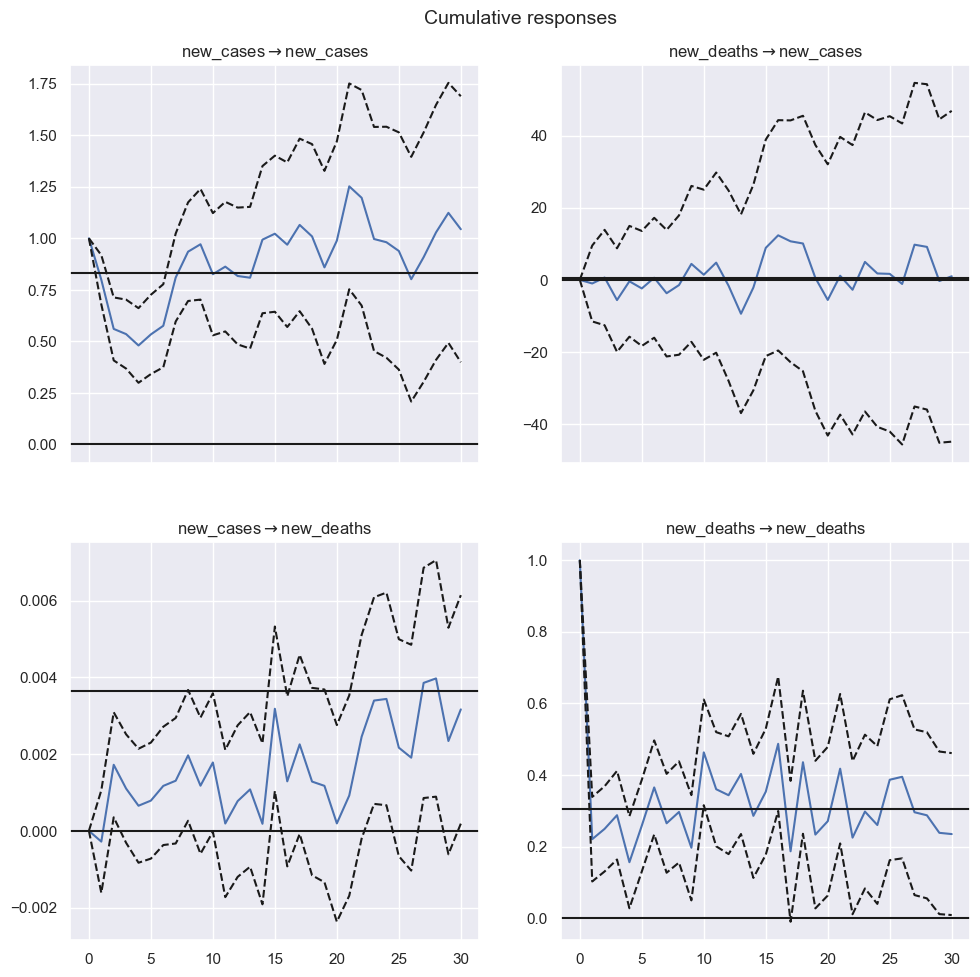

In [57]:
irf.plot_cum_effects(orth=False);
#Manu: no tiene mucho sentido estudiarlo porque los muertos acumulados no aportan información

## Descomposición del error de predicción

In [58]:
fevd = results.fevd(30)

In [59]:
fevd.summary()

FEVD for new_cases
      new_cases  new_deaths
0      1.000000    0.000000
1      0.999878    0.000122
2      0.999575    0.000425
3      0.995129    0.004871
4      0.992088    0.007912
5      0.991669    0.008331
6      0.990702    0.009298
7      0.989187    0.010813
8      0.988798    0.011202
9      0.985214    0.014786
10     0.984548    0.015452
11     0.983418    0.016582
12     0.979302    0.020698
13     0.973289    0.026711
14     0.968936    0.031064
15     0.957531    0.042469
16     0.956502    0.043498
17     0.956555    0.043445
18     0.956625    0.043375
19     0.949202    0.050798
20     0.946558    0.053442
21     0.945413    0.054587
22     0.944288    0.055712
23     0.941030    0.058970
24     0.940227    0.059773
25     0.940297    0.059703
26     0.940426    0.059574
27     0.931765    0.068235
28     0.932371    0.067629
29     0.926083    0.073917

FEVD for new_deaths
      new_cases  new_deaths
0      0.000001    0.999999
1      0.000415    0.999585
2      0

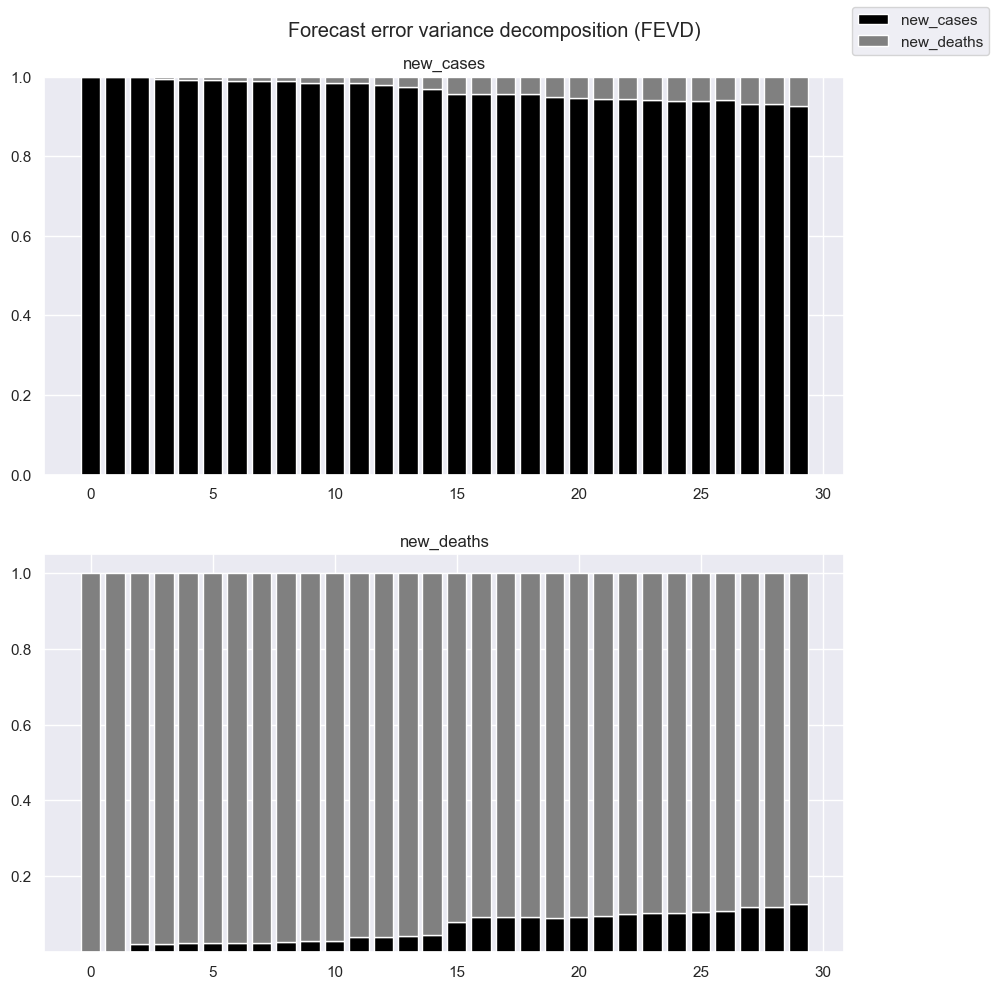

In [60]:
results.fevd(30).plot();